# Stock Market Analysis

## Introduction
This is a project on the CNBC's "Magnificent Seven" stocks, a coined term used to group seven of the most influential technology companies in the U.S. stock market at the moment. 

I will be working with data from Yahoo Finance and applying analytical skills to surface several insights. 

Here's an overview of my work:
- Analyzing the risk of stocks based on previous performance history.
- Prediction of the future stock prices by Long Short Term Memory (LSTM) method. 

## Analysis Process
Link to the Sample Section: [Here is to ds](#ds)


### Setting up DataFrame

In [76]:
# Installing required libraries
%pip install numpy pandas matplotlib seaborn
%pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [77]:
# Importing modules
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt      
import seaborn as sns              


In [83]:
import yfinance as yf
from datetime import datetime

# Setting up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# The Magnificent 7 stocks
stock_ticker_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA', 'META']
stock_info_list = []
stock_info_period_list = []

# Grabbing Yahoo ticker object
for stock in stock_ticker_list:
    stock_info_list.append(yf.Ticker(stock))

# Grabbing stock history of Yahoo ticker objects using time period
for stock in stock_info_list:
    stock_info_period_list.append(stock.history(start=start, end=end))

# Combining the information of the stocks with the company name
for stock, company in zip(stock_info_period_list, stock_ticker_list):
    stock['Company'] = company

df = pd.concat(stock_info_period_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2024-12-26 00:00:00-05:00,605.479980,606.299988,598.940002,603.349976,6081400,0.0,0.0,META
2024-12-27 00:00:00-05:00,599.409973,601.849976,589.799988,599.809998,8084200,0.0,0.0,META
2024-12-30 00:00:00-05:00,588.750000,596.940002,585.580017,591.239990,7025900,0.0,0.0,META
2024-12-31 00:00:00-05:00,592.270020,593.969971,583.849976,585.510010,6019500,0.0,0.0,META
2025-01-02 00:00:00-05:00,589.719971,604.909973,587.820007,599.239990,12682300,0.0,0.0,META
2025-01-03 00:00:00-05:00,604.760010,609.500000,596.409973,604.630005,11436800,0.0,0.0,META
2025-01-06 00:00:00-05:00,611.830017,630.989990,605.619995,630.200012,14560800,0.0,0.0,META
2025-01-07 00:00:00-05:00,631.700012,632.099976,608.229980,617.890015,12071500,0.0,0.0,META
2025-01-08 00:00:00-05:00,613.400024,616.440002,602.789978,610.719971,10085800,0.0,0.0,META


### Descriptive Statistics of Individual Stocks



In [84]:
# Assign the historical data to variables
AAPL, GOOG, MSFT, AMZN, TSLA, NVDA, META = stock_info_period_list

# Describe the historical data for AAPL
NVDA.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.000000
mean,110.116950,112.101999,107.766966,109.992950,3.718364e+08,0.000135,0.039683
std,26.071663,26.348290,25.519794,25.858539,1.603082e+08,0.001114,0.629941
min,53.600802,54.584520,53.473835,54.334591,1.051570e+08,0.000000,0.000000
25%,88.625027,90.489094,86.856954,88.617781,2.455632e+08,0.000000,0.000000
50%,116.806948,118.701822,114.587104,116.831947,3.420942e+08,0.000000,0.000000
75%,133.192108,135.012808,129.512498,131.894726,4.734792e+08,0.000000,0.000000
max,153.029999,153.130005,147.820007,149.429993,1.142269e+09,0.010000,10.000000


In [85]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-10 00:00:00-05:00 to 2025-01-10 00:00:00-05:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
 7   Company       252 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 17.7+ KB


## Indicators of Stock Performance

### 1A. Closing Price
Closing price is an obvious visual benckmark to track stock performance over time.


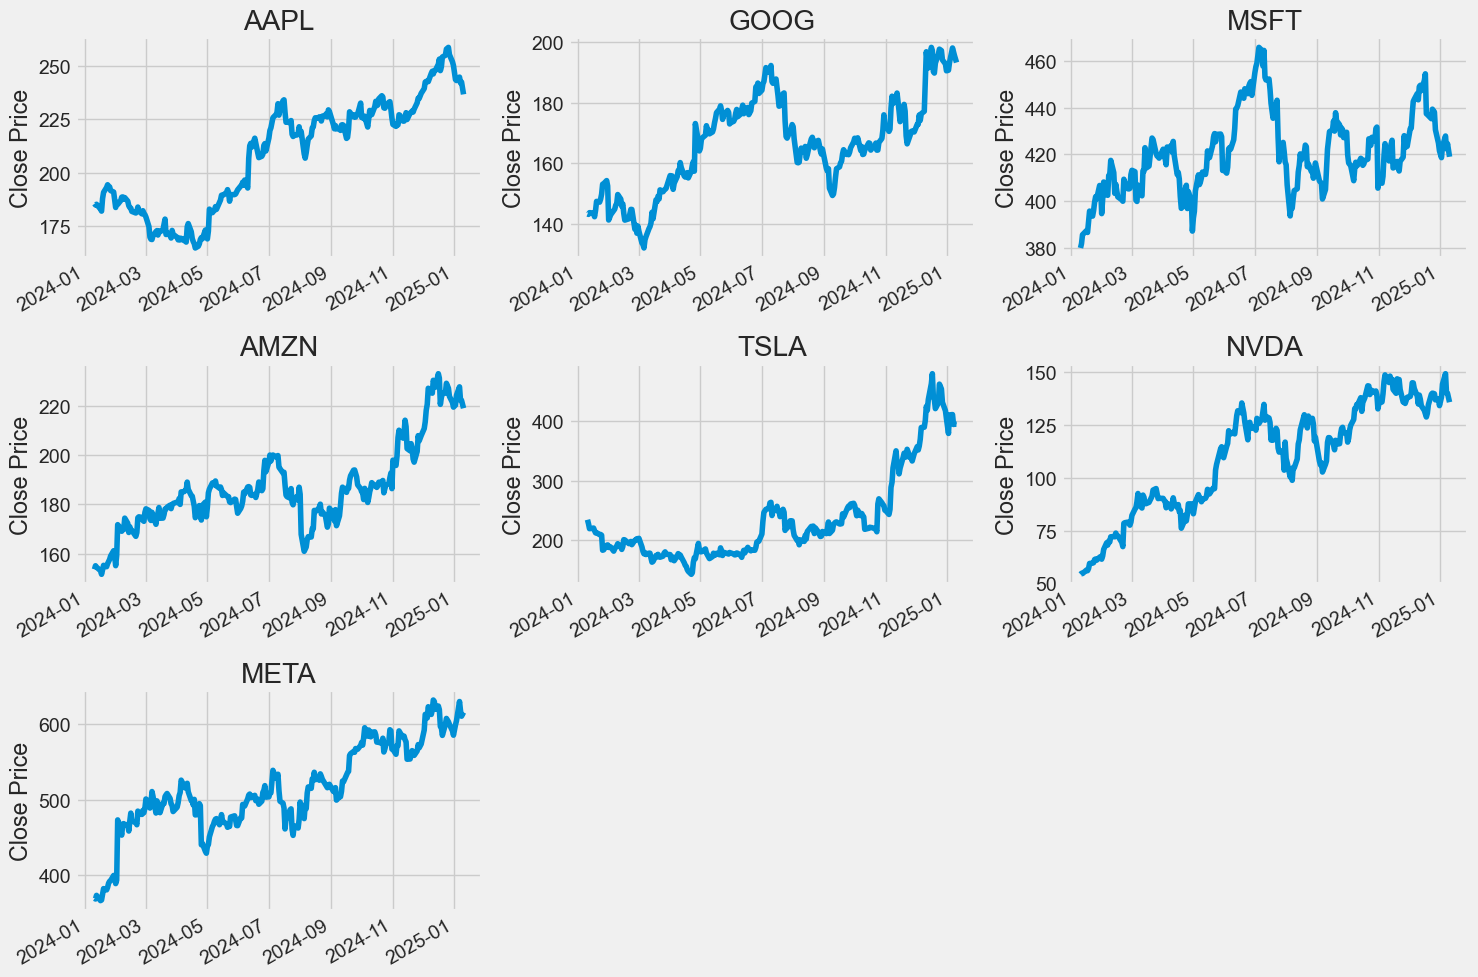

In [38]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_info_period_list, 1):
    plt.subplot(3, 3, i)
    stock['Close'].plot()
    plt.title(stock_ticker_list[i - 1])
    plt.ylabel('Close Price')
    plt.xlabel(None)

plt.tight_layout()
plt.show()


### 1B. Daily Return
Closing price can be transformed by focusing on the change of its value. This is called Daily Return. 


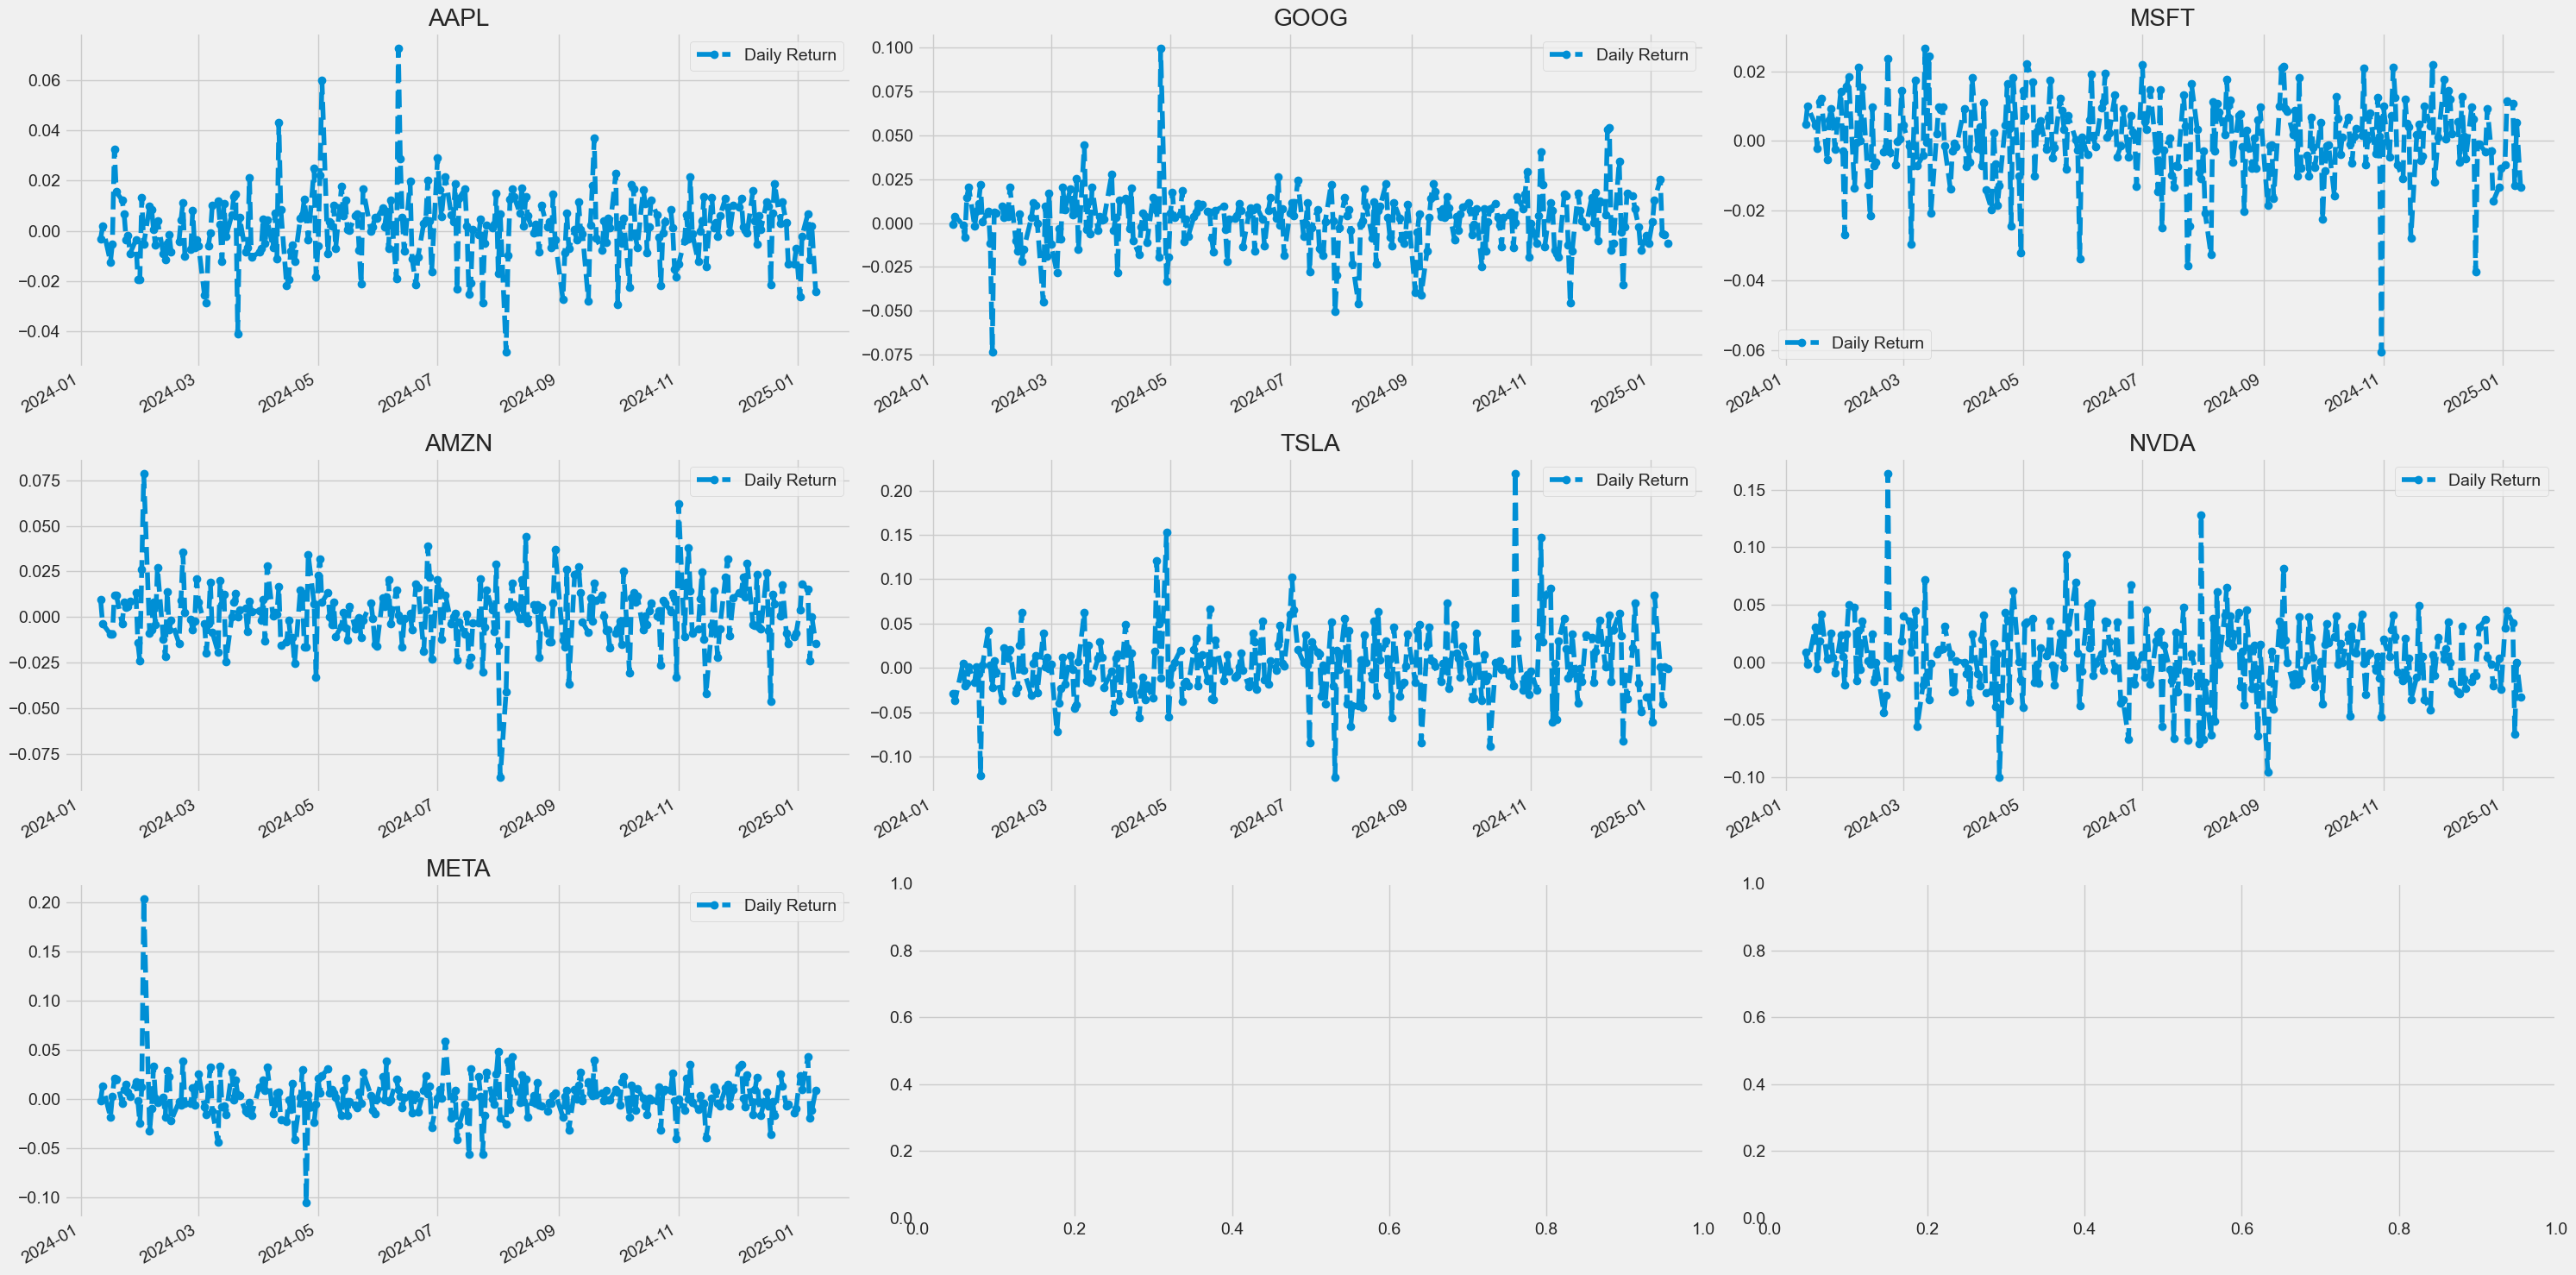

In [41]:
for stock in stock_info_period_list:
    stock['Daily Return'] = stock['Close'].pct_change()

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(30)

for i, stock in enumerate(stock_info_period_list, 1):
    stock['Daily Return'].plot(ax=axes.flat[i - 1], legend=True, linestyle='--', marker='o')
    axes.flat[i - 1].set_title(f'{stock_ticker_list[i - 1]}')
    axes.flat[i - 1].set_xlabel(None)

plt.tight_layout()
plt.show()

### Closing Price vs. Daily Return

### 2. Trading Volume
Trading volume is the number of an asset or security that has been exchanged over a period of time.

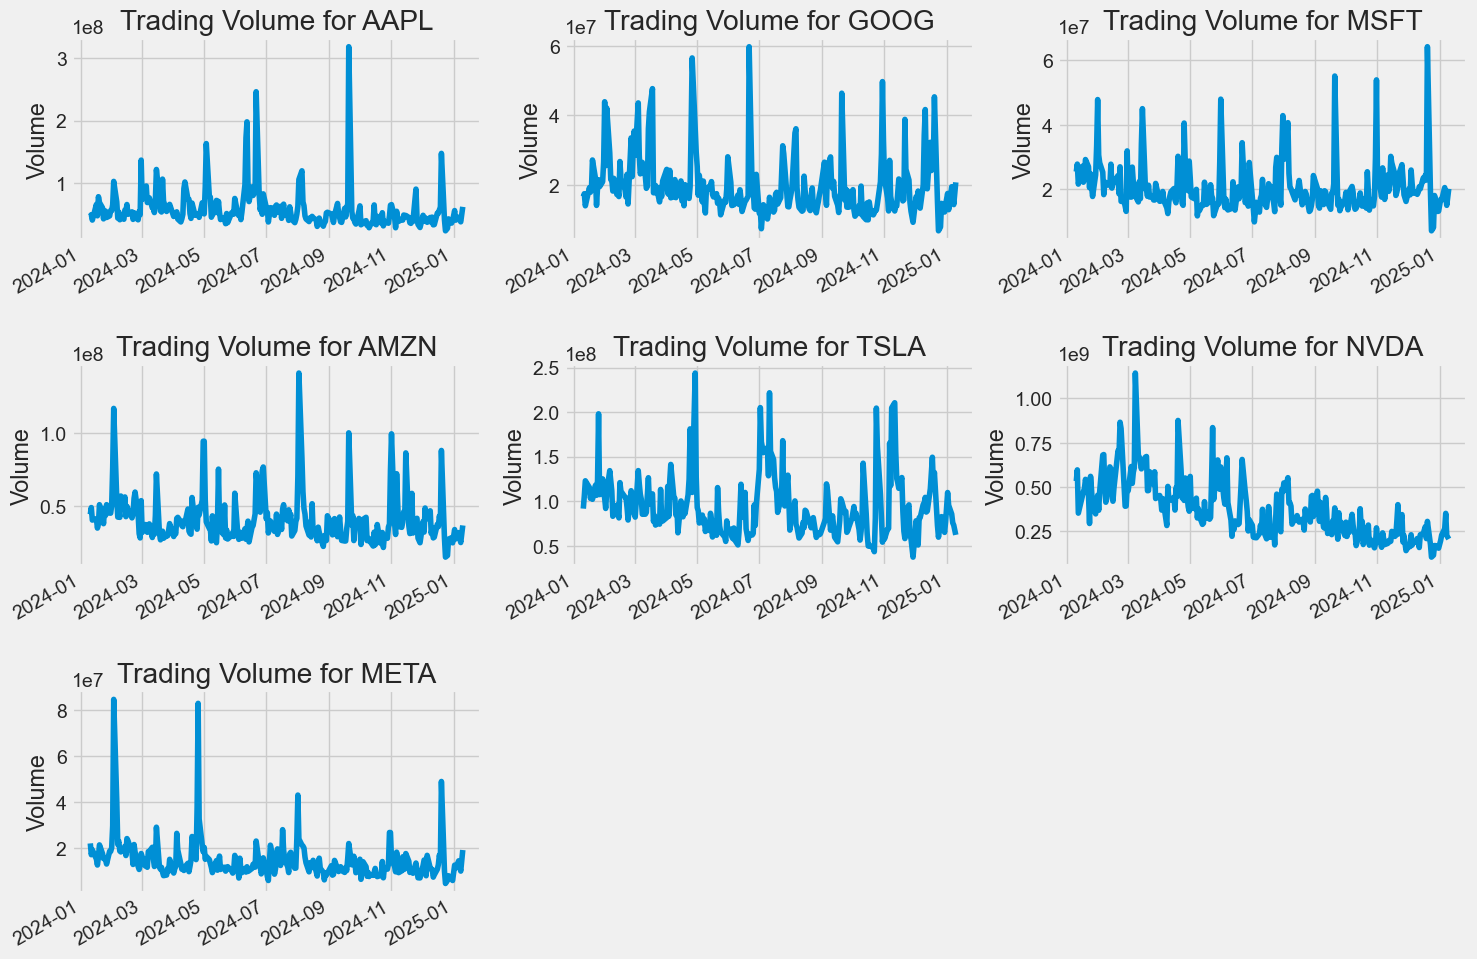

In [90]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_info_period_list, 1):
    plt.subplot(3, 3, i)
    stock['Volume'].plot()
    plt.title(f'Trading Volume for {stock_ticker_list[i - 1]}')
    plt.ylabel('Volume')
    plt.xlabel(None)

plt.tight_layout()
plt.show()


### Can be used to news

### Comment

## Using Daily Returns as Index to look at Volatility/Risk
Using the data in histogram, which can be visualized in kernel density estimate plot as well.
Can use this data to perform statistical analysis for correlation.
Correlation is a statistic that measures the degree to which two variables move in relation to each other. 
Correlation is bounded between -1.0 and 1.0
Correlation measures association, but doesn't provide evidence for causation. 


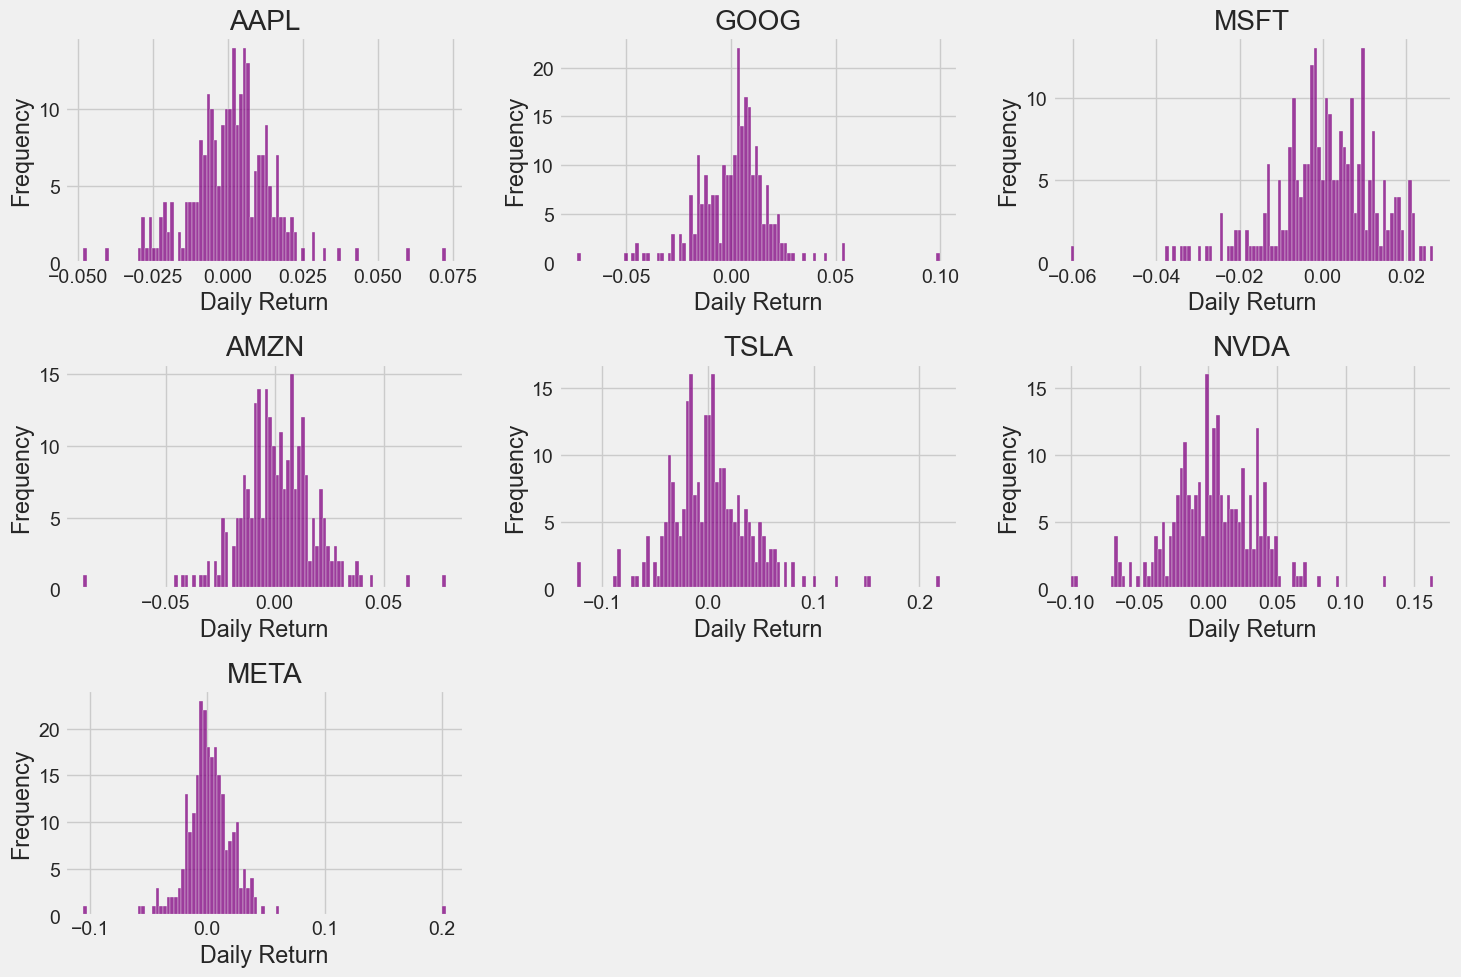

In [42]:
plt.figure(figsize=(15, 10))

for i, stock in enumerate(stock_info_period_list, 1):
    plt.subplot(3, 3, i)
    sns.histplot(stock['Daily Return'].dropna(), bins=100, color='purple')
    plt.title(f'{stock_ticker_list[i - 1]}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### volatility Comment

In [43]:
# Create a new DataFrame to store the daily return in prices of the stocks
daily_return_df = pd.concat([AAPL['Daily Return'], GOOG['Daily Return'], MSFT['Daily Return'], AMZN['Daily Return'], TSLA['Daily Return'], NVDA['Daily Return'], META['Daily Return']], axis=1)
daily_return_df.columns = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA', 'META']
daily_return_df.head()



,AAPL,GOOG,MSFT,AMZN,TSLA,NVDA,META
Date,,,,,,,
2024-01-10 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-11 00:00:00-05:00,-0.003223,-0.000904,0.004859,0.009432,-0.028725,0.008684,-0.002159
2024-01-12 00:00:00-05:00,0.001778,0.003967,0.009984,-0.003609,-0.036661,-0.002043,0.013039
2024-01-16 00:00:00-05:00,-0.012317,-0.001109,0.004634,-0.009442,0.004660,0.030561,-0.018772
2024-01-17 00:00:00-05:00,-0.005173,-0.008259,-0.002050,-0.009467,-0.019826,-0.005835,0.002477


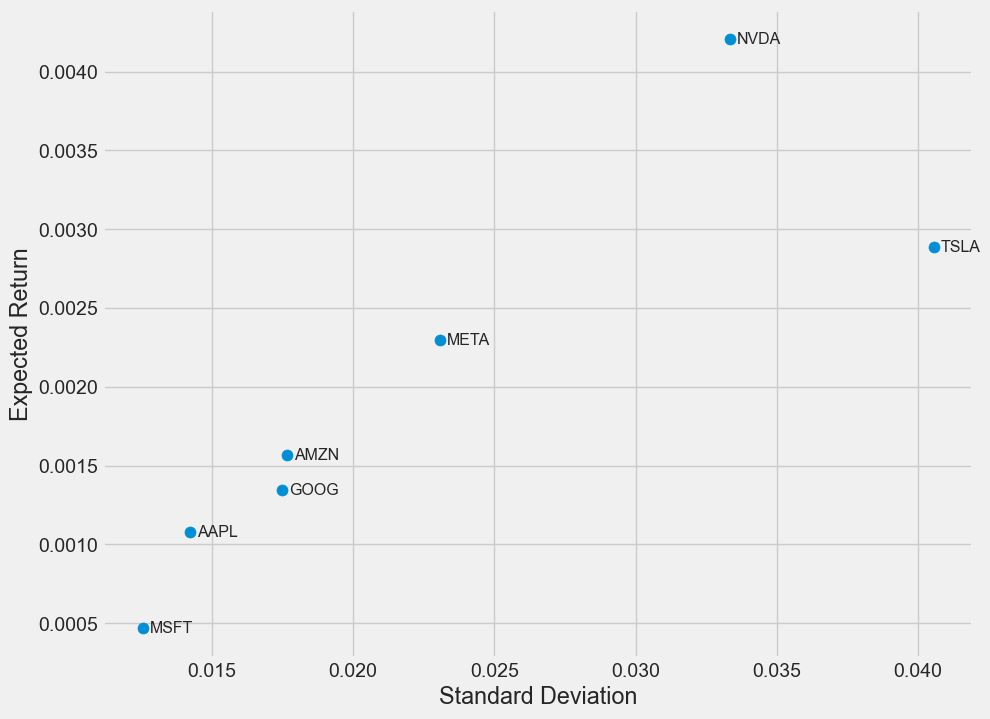

In [101]:
df_noNAN = daily_return_df.dropna()    

area = np.pi*20     # Set the size of the points

plt.figure(figsize=(10, 8))
# Create a scatter plot for the daily return of the stocks
plt.scatter(df_noNAN.std(),df_noNAN.mean(),s=area)        
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

for label, x, y in zip(df_noNAN.columns, df_noNAN.std(), df_noNAN.mean()):
    plt.annotate(
        label, 
        xy=(x, y), 
        xytext=(5, 0),
        textcoords='offset points', ha='left', va='center', fontsize=11.5,
    )
    
plt.show()

### Interpretation
- Based on the past year's data, the expected return for TSLA unexpected growth. 